In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Testes de Hipóteses



Testes estatísticos são regras de decisão que permitem avaliar a razoabilidade das hipóteses feitas sobre os parâmetros populacionais e aceitá-las ou rejeitá-las como provavelmente verdadeiras ou falsas tendo como base uma amostra.

Nesta Aula:
0. Um problema e uma Introdução


1. Etapas Básicas de um Teste


2. Teste de Normalidade


3. Testes Paramétricos


    1. Teste Bicaudal
    2. Teste Unicaudal
    4. Testes para Duas Amostras
    


# <font color="blue">0. Introdução

Uma máquina automática para encher pacotes de café enche-os segundo uma distribuição normal, com média $ \mu $ e variância sempre igual a 400$g^2$, a máquina foi regulada para $\mu$ = 500$g$.

Periodicamente uma amostra de 32 pacotes é recolhida para verificar se a produção está sob controle, isto é $\mu$ = 500g ou não.

Se uma dessas amostras apresentar média x = 492g, deve-se parar a produção para regular a máquina ou não?

*Retirado de BUSSAB, W. O.; MORETTIN, P. A. Estatística básica. 6. ed.* ← ótimo livro!
    


Você acha que a máquina está desregulada?

### O que podemos fazer nesse caso?

Entram os testes de hipótese!


**A ideia por trás do teste de hipótese então, é calcular a probabilidade do evento observado e descartar a hipótese caso esse evento seja muito raro**

Podemos começar definindo um intervalo de normalidade de operação da máquina: sabemos que ela não é perfeita, mas os pacotes devem ser produzidos seguindo a distribuição normal de média 500$g$ e variância 400$g^2$.

**Importação das Bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

## <font color="blue">1. Etapas Básicas de um Teste</font>
***

### **Passo 1** - Formulação das hipóteses $H_0$ e $H_1$

> ### <font color='red'>Pontos importantes</font>
> - A hipótese nula sempre afirma uma igualdade ou propriedade populacional, e $H_1$ a desigualdade que nega $H_0$.
> - No caso da hipótese nula $H_0$ a igualdade pode ser representada por uma igualdade simples "$=$" ou por "$\geq$" e "$\leq$". Sempre complementar ao estabelecido pela hipótese alternativa.
> - A hipótese alternativa $H_1$ deve definir uma desigualdade que pode ser uma diferença simples "$\neq$" ou dos tipos "$>$" e "$<$".


**No nosso problema temos uma condição normal (comum) e uma hipótese:**
    
$\rightarrow$ condição: máquina está regulada para média=500$g$ e variância=400$g^2$

> $$H_0: \mu = 500$$
>
> $$H_1: \mu \neq 500$$

### **Passo 2** - Escolha da distribuição amostral adequada

> ### <font color='red'>Pontos importantes</font>
> - Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar a distribuição normal, como estabelecido pelo **teorema do limite central**.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for conhecido, deve-se utilizar a distribuição normal.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional não for conhecido, deve-se utilizar a distribuição t de Student.





![](https://cdn1.gnarususercontent.com.br/1/742707/9a27e545-35a5-499d-9d71-3f8c5e99fbb8.png)

Temos 32 elementos e sabemos o valor de sigma (desvio da população) = 20

O desvio da amostra é dado pelo desvio da população dividio pela raiz de n elementos


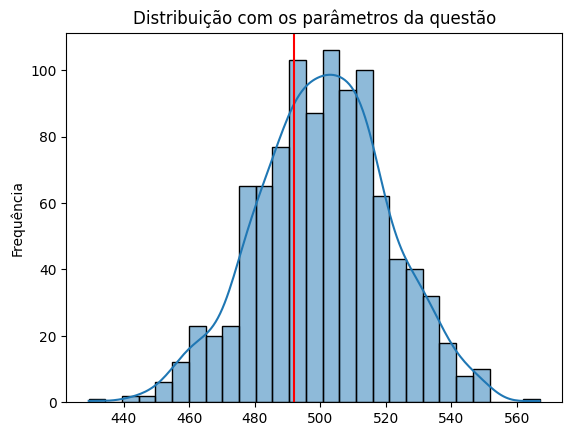

In [ ]:
# Vamos plotar uma distribuição com os parâmetros dados pela questão:

ax = sns.histplot(np.random.normal(loc=500, scale=20, size=1000), kde=True)
ax.axvline(x=492, color='red')
ax.set_title('Distribuição com os parâmetros da questão')
ax.set_ylabel('Frequência')
plt.show()



Pelo gráfico até parece que 492g não está distante de 500g.

### **Passo 3** - Fixação da significância do teste ($\alpha$), que define as regiões de aceitação e rejeição das hipóteses (os valores mais freqüentes são 10%, 5% e 1%);

> ### <font color='red'>Pontos importantes</font>
> - O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.
>
> <img alt="Níveis de Confiança e significância" src="https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img001.png" style="display: block; margin: 25px auto" />
>
> - O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.
>
> <img alt="Áreas de Aceitação e Rejeição" src="https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img002.png" style="display: block; margin: 25px auto; border-radius: 10px" />

Vamos usar 5%, isso quer dizer que vamos considerar como resultado "comum", "evento comum", valores de média de amostra que acontecem até 95% das vezes.

Vamos considerar que os valores nos 5% das caudas serão considerados eventos muito raros para nossa amostra e vamos considerar como um sinal de que há algo de errado com a máquina.

In [ ]:
alpha = 0.05

# Para teste unicaudal a direita teremos:

print(f"Unicaudal a direita -> Zc = {norm.isf(alpha)}")

# Unicaudal a esquerda:

print(f"Unicaudal a esquerda -> Zc = {norm.ppf(alpha)}")

#Bicaudal:

print(f"Zc_1 = {norm.ppf(alpha / 2)}, Zc_2 = {norm.isf(alpha / 2)}")

Unicaudal a direita -> Zc = 1.6448536269514729
Unicaudal a esquerda -> Zc = -1.6448536269514729
Zc_1 = -1.9599639845400545, Zc_2 = 1.9599639845400545


### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste;

> ### <font color='red'>Pontos importantes</font>
> - Nos testes paramétricos, distância relativa entre a estatística amostral e o valor alegado como provável.
> - Neste passo são obtidas as estatísticas amostrais necessárias à execução do teste (média, desvio-padrão, graus de liberdade etc.)

Relembrando os valores que temos:

média = 500, desvio = 20

média amostra = 492, erro padrão = 3.53

significância = 5%

H1 do tipo "diferente"

> $\mu = 500$
>
> $\sigma = 20$
>
> $\bar{x} = 492$
>
> $\sigma_\bar{x} = \frac{σ}{\sqrt{n}} ≈ 3.53$

Devemos calcular a estatística de teste:


$$Z = \frac{X - \mu}{\sigma / raiz de n}$$

In [ ]:
Z_teste = (492 - 500) / 3.53

print(f"Estatística de teste = {Z_teste}")

Estatística de teste = -2.26628895184136


Ou seja:

**A estatística de teste obtida (-2,26) é menor do que o $Z_c$ (-1,96). Portanto, está dentro da região crítica.**

### **Passo 5** - Aceitação ou rejeição da hipótese nula.

> ### <font color='red'>Pontos importantes</font>
> - No caso de o intervalo de aceitação conter a estatística-teste, aceita-se $H_0$ como estatisticamente válido e rejeita-se $H_1$ como tal.
> - No caso de o intervalo de aceitação não conter a estatística-teste, rejeita-se $H_0$ e aceita-se $H_1$ como provavelmente verdadeira.
> - A aceitação também se verifica com a probabilidade de cauda (p-valor): se maior que $\alpha$, aceita-se $H_0$.



 Conclusão: <font color="red">rejeitamos<font color="black"> a hipótese nula ($\mu = 500$) e devemos ajustá-la!

## <font color="blue">Vamos agora ver mais exemplos de outros casos

## <font color="blue">1. Teste de Normalidade</font>
***

**Carregando nosso dataset**

In [ ]:
path = '/content/drive/MyDrive/AdaTech/Estatística I/pnad_2015.csv'

pnad = pd.read_csv(path)

In [ ]:
pnad.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [ ]:
# Import da biblioteca statsmodels:

import statsmodels.api as sm

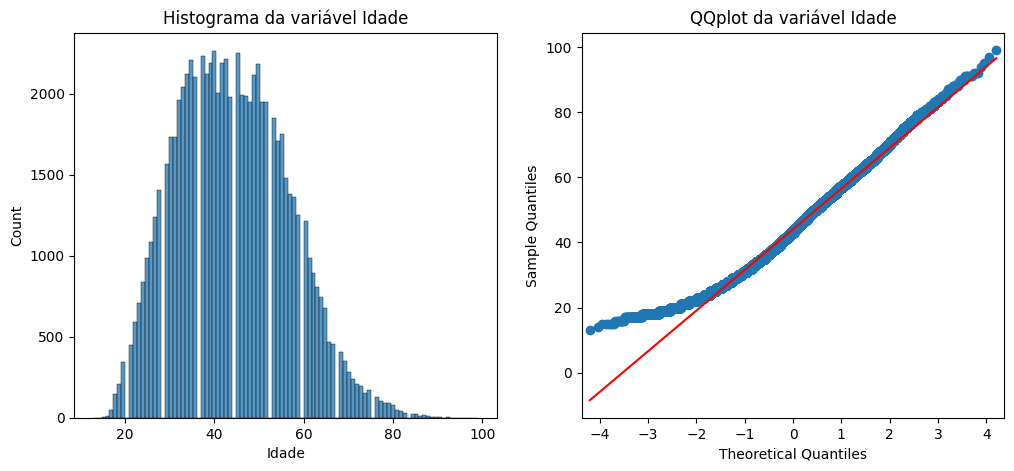

In [ ]:
# Análise gráfica distribuição da variável idade:

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax1 = sns.histplot(data=pnad, x='Idade', ax=ax[0])
ax1.set_title('Histograma da variável Idade')
ax2 = sm.qqplot(data=pnad['Idade'], line='s', ax=ax[1])
ax[1].set_title('QQplot da variável Idade')
plt.show()

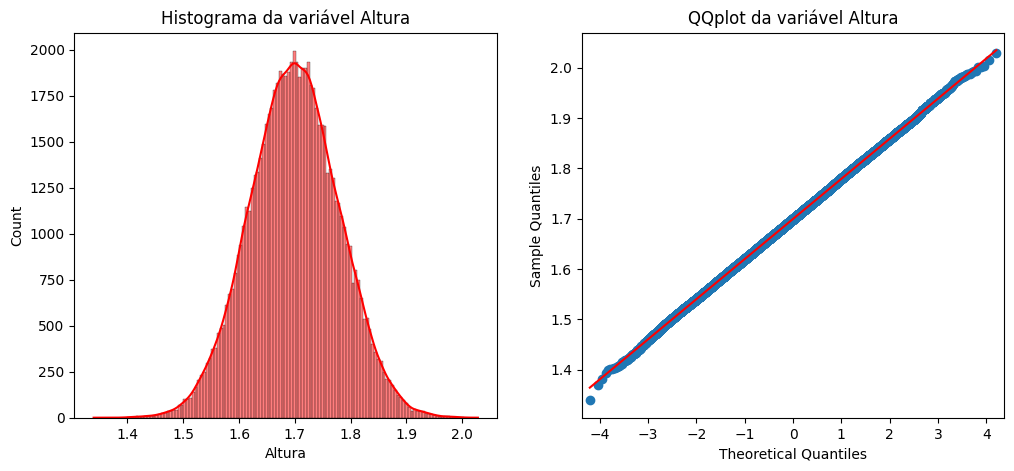

In [ ]:
# Análise gráfica distribuição da variável Altura:

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax1 = sns.histplot(data=pnad, x='Altura', color='red', kde=True, ax=ax[0])
ax1.set_title('Histograma da variável Altura')
ax2 = sm.qqplot(data=pnad['Altura'], line='s', ax=ax[1])
ax[1].set_title('QQplot da variável Altura')
plt.show()

### Importando a biblioteca
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [ ]:
# Import da normaltest

from scipy.stats import normaltest

A função *normaltest* testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal.

- $H_0$: vem de uma distribuição normal.  
- $H_1$: oriunda de uma distribuição que não é normal.

### Definindo a significância do teste ($\alpha$)

In [ ]:
conf = 0.95

In [ ]:
alpha = 1 - conf # 0.05 = 5%

### Testando a variável Idade

> Z1 = -1.96
>
> Z2 = 1.96

In [ ]:
# Variável idade:

normaltest(pnad['Idade'])

NormaltestResult(statistic=1649.3132619242504, pvalue=0.0)

In [ ]:
test, pvalue = normaltest(pnad['Idade'])

In [ ]:
test, pvalue

(1649.3132619242504, 0.0)

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq \alpha \, (0,05)$

In [ ]:
if pvalue <= alpha:
    print('Rejeita H0, ou seja, a amostra não segue uma distribuição normal.')
else:
    print('Aceita H0, ou seja, a amostra segue uma distribuição normal')

Rejeita H0, ou seja, a amostra não segue uma distribuição normal.


### Testando a variável Altura

In [ ]:
test, pvalue = normaltest(pnad['Altura'])

In [ ]:
pvalue

0.9049591541967501

In [ ]:
test

0.19973093957002253

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [ ]:
if pvalue <= alpha:
    print('Rejeita H0, ou seja, a amostra não segue uma distribuição normal.')
else:
    print('Aceita H0, ou seja, a amostra segue uma distribuição normal')

Aceita H0, ou seja, a amostra segue uma distribuição normal


---

![](https://player.slideplayer.com.br/70/12135716/slides/slide_8.jpg)

## <font color=blue>3. TESTES PARAMÉTRICOS</font>
***

Quando um teste assume determinadas premissas sobre como os parâmetros de uma população se distribuem, estamos trabalhando com **Testes Paramétricos**.

### <font color=blue>3.1 Teste Bicaudal</font>
***

## <font color='red'>Problema</font>

A empresa **Suco Bom** produz **sucos de frutas em embalagens de 500 ml**. Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa **Suco Bom** extrai, periodicamente, **amostras de 50 embalagens** para monitorar o processo de produção. Para cada amostra, é realizado um **teste de hipóteses** para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um **nível de significância de 5%**.

Suponha agora que uma **amostra de 50 embalagens** foi selecionada e que a **média amostral observada foi de 503,24 ml**. **Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%, com desvio padrão populacional de 4.4?**

---

O **teste bicaudal** é muito utilizado em **testes de qualidade**, como o apresentado em nosso problema acima. Outro exemplo é a avaliação de peças que devem ter um encaixe perfeito (porcas e parafusos, chaves e fechaduras).

![Teste Bicaudal](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img005.png)

---

### Dados do problema

In [ ]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505,
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505,
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501,
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495,
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [ ]:
# Passar para um dataframe:

dados = pd.DataFrame({'Volume': amostra})

In [ ]:
dados.head()

,Volume
0,509
1,505
2,495
3,510
4,496


In [ ]:
# Shape dos dados:

dados.shape

(50, 1)

In [ ]:
# Média da amostra:

media_amostral = dados['Volume'].mean()
media_amostral

503.24

In [ ]:
# Desvio padrão amostral:

desvio_amostral = dados['Volume'].std()
desvio_amostral

4.48380305052735

In [ ]:
# Os dados do problema:

mu = 500 # média populacional
n = len(dados)
sigma = 4.4 # desvio padrão populacional

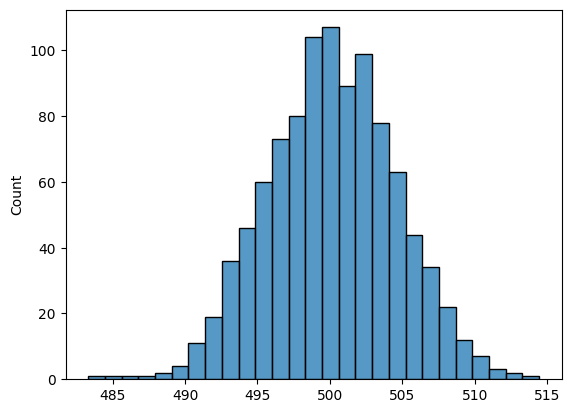

In [ ]:
# Distribuição dos dados com os parâmetros:

ax = sns.histplot(np.random.normal(loc=500, scale=4.4, size=1000))
plt.show()

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

> $H_0: \mu = 500 \, ml$
>
> $H_1: \mu \neq 500 \, ml$

---

### **Passo 2** - escolha da distribuição amostral adequada



![](teste_hipotese_imagem.png)

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Sim

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [ ]:
conf = 0.95

In [ ]:
alpha = 1 - conf # 0.05 = 5%

### Obtendo $z_{\alpha/2}$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [ ]:
Zc = norm.isf(alpha / 2)
Zc

1.959963984540054

<img style="border-radius: 10px" alt="Região de Aceitação" src="https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png" />

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

Agora que sabemos que existem funções prontas para os testes de hipótese, podemos partir diretamente para eles!

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

In [ ]:
# Import do ztest:

from statsmodels.stats.weightstats import ztest

In [ ]:
# Uso da função para obter a estatística de teste:

test, pvalue = ztest(dados['Volume'], value=mu) # média populacional

In [ ]:
f"Estatística do teste = {test:.1f}"

'Estatística do teste = 5.1'

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

In [ ]:
# Import de DescrStatsW:

from statsmodels.stats.weightstats import DescrStatsW

In [ ]:
stats = DescrStatsW(dados['Volume'])

In [ ]:
test, pvalue = stats.ztest_mean(value=mu)
print(f'Estatística de teste = {test:.1f}')

Estatística de teste = 5.1


![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img007.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=100%>

### <font color='green'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

In [ ]:
if test <= Zc or test >= Zc:
  print('Rejeita-se a hipótese nula, a média não é 500 mL.')
else:
  print('Não rejeita-se a hipótese nula, a média é 500 mL.')

Rejeita-se a hipótese nula, a média não é 500 mL.


### <font color='orange'>Conclusão: Como a média amostral $\bar{x}$ é significativamente maior que 500 ml, rejeitamos $H_0$. Neste caso, devem ser tomadas providências para ajustar o maquinário que preenche as embalagens.</font>

### <font color='green'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
pvalue

3.2291031724457596e-07

In [ ]:
if pvalue <= alpha:
  print('Rejeita-se a hipótese nula, a média não é 500 mL.')
else:
  print('Não rejeita-se a hipótese nula, a média é 500 mL.')

Rejeita-se a hipótese nula, a média não é 500 mL.


---

## <font color=green>3.2 Teste Unicaudal</font>
***

## <font color='red'>Problema</font>

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, **no máximo**, **37 gramas de açúcar**. Esta alegação nos leva a entender que a quantidade média de açúcar em uma lata de refrigerante deve ser **igual ou menor que 37 g**.

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatoriamente, em um conjunto de estabelecimentos distintos, **uma amostra de 25 latas** do refrigerante em questão. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as 25 latas de sua amostra.

**Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?**

In [ ]:
# Unicaudal
# 25 latas < 30: t-Student

### 3.2.1. Conhecendo a Distribuição $t$-student
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img004.png' width='250px'>

### Propriedades

- A função densidade da distribuição t de Student tem a mesma forma em sino da distribuição Normal, mas reflete a maior variabilidade (com curvas mais alargadas) que é de se esperar em amostras pequenas.
- Quanto maior o grau de liberdade, mais a distribuição t de Student se aproxima da distribuição Normal.

In [ ]:
from scipy.stats import t

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
# def norm_t_df(df):

#     x = np.linspace(-4,4,10000)
#     y = t.pdf(x = x, df = df)
#     yn = norm.pdf(x)

#     plt.figure(figsize = (7,3.5))

#     plt.plot(x, y, label = 't-Student distribution')
#     plt.plot(x, yn, label = 'normal distribution')

#     plt.legend()

In [ ]:
# widgets.interact(norm_t_df, df = (1, 50, 5))

![](https://sweet.ua.pt/pedrocruz/bioestatistica/_images/da-t-student.png)

---

#### Tabela t de Student
![image.png](https://upload.wikimedia.org/wikipedia/commons/1/1f/Distribui%C3%A7%C3%A3o_t_student-_p-valor.gif)

### 3.2.2. Teste Unicaudal

Os **testes unicaudais** verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img008.png' width='700px'>

### Dados do problema

In [ ]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49,
           36.53, 35.49, 36.90, 34.52, 37.30,
           34.99, 36.55, 36.29, 36.06, 37.42,
           34.47, 36.70, 35.86, 36.80, 36.92,
           37.04, 36.39, 37.32, 36.64, 35.45]

In [ ]:
len(amostra)

25

In [ ]:
# Converter para um DataFrame

refri = pd.DataFrame({'Massa': amostra})

In [ ]:
refri.head()

,Massa
0,37.27
1,36.42
2,34.84
3,34.60
4,37.49


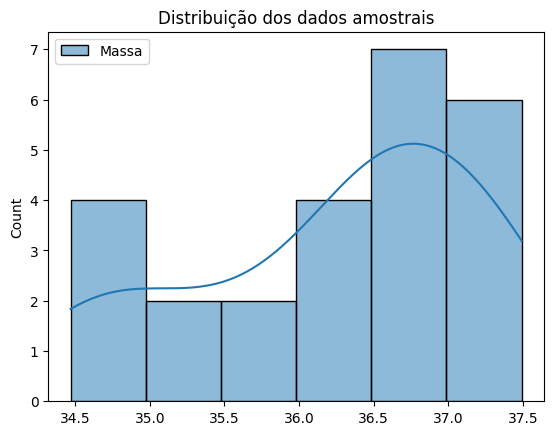

In [ ]:
# Visualização

ax = sns.histplot(refri, kde=True)
ax.set_title('Distribuição dos dados amostrais')
plt.show()

In [ ]:
#Vericando a normalidade

normaltest(refri)

NormaltestResult(statistic=array([3.09493178]), pvalue=array([0.21278652]))

In [ ]:
# media amostral

media_amostral = refri['Massa'].mean()
media_amostral

36.2504

In [ ]:
# desvio padrão amostral

desvio_amostral = refri['Massa'].std()
desvio_amostral

0.9667535018469455

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$


#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

> $H_0: \mu \leq 37 \, g$
>
>  $H_1: \mu > 37 \, g$

---

### **Passo 2** - escolha da distribuição amostral adequada

![](teste_hipotese_imagem.png)

### O tamanho da amostra é maior que 30?
#### Resp.: Não

### Podemos afirmar que a população se distribui aproximadamente como uma normal?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - Fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [ ]:
conf = 0.95

In [ ]:
alpha = 1 - conf # 0.05 ou 5%

### Obtendo $t_{\alpha}$

In [ ]:
# Import da t_student:

from scipy.stats import t as t_student

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img009.png)

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste


https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [ ]:
stats = DescrStatsW(refri['Massa'])

In [ ]:
# ztest_mean: Distribuição Normal
# ttest_mean: Distribuição t-Student

In [ ]:
# Como a região crítica está a direita, o parâmetro alternativo receber 'larger':

test, pvalue, grau_liberdade = stats.ttest_mean(value=37, alternative='larger')
print(f"Estatística de teste = {test}")

Estatística de teste = -3.8768931199520447


![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img010.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se $t \geq t_{\alpha}$

In [ ]:
# if test >= t_alpha:
#   print('Rejeita-se a hipótese nula, a média é maior que 37 g.')
# else:
#   print('Não rejeita-se a hipótese nula, a média é menor ou igual a 37.')

### <font color='green'>Conclusão: Com um nível de confiança de 95% não podemos rejeitar $H_0$, ou seja, a alegação do fabricante é verdadeira.</font>

### <font color='red'>Critério do $p$ valor</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
print(f"Pvalue = {pvalue}")

Pvalue = 0.9996406170303819


In [ ]:
if pvalue <= alpha:
  print('Rejeita-se a hipótese nula, a média é maior que 37 g.')
else:
  print('Não rejeita-se a hipótese nula, a média é menor ou igual 37 g.')

Não rejeita-se a hipótese nula, a média é menor ou igual 37 g.


---

## <font color=green>3.4 Testes para Duas Amostras</font>
***

## <font color='red'>Problema</font>

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleatórias, uma de **500 homens** e outra com **500 mulheres**, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade, **teste a igualdade das médias** entre estas duas amostras com um nível de **significância de 1%**.

---

É possível também utilizar testes de hipóteses para comparar duas diferentes amostras. Neste tipo de teste se deseja decidir se uma amostra é diferente da outra.

### Seleção das amostras

In [ ]:
pnad.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


> Homens = 0
>
> Mulheres = 1

In [ ]:
# Amostra dos homens:

homens = pnad.query("Sexo == 0")['Renda'].sample(n=500, random_state=101)
homens.head()

26241     300
65579    1000
58984    4000
65931    5000
25501     300
Name: Renda, dtype: int64

In [ ]:
mulheres = pnad.loc[pnad['Sexo'] == 1]['Renda'].sample(n=500, random_state=101)
mulheres.head()

10179     788
43943    1200
75223    6000
33243    1000
5189      788
Name: Renda, dtype: int64

### Obtendo dados do problema

- Média e desvio padrão das mulheres
- Média e desvio padrão dos homens
- Número de amostras (homens e mulheres)
- Nível de significância e confiança

In [ ]:
media_homens = homens.mean() # média de renda dos homens (renda)
media_mulheres = mulheres.mean() # média de rena das mulheres (renda)

media_homens, media_mulheres

(2142.608, 1357.528)

In [ ]:
std_homens = homens.std() # desvio padrão amostral dos homens (renda)
std_mulheres = mulheres.std()  # desvio padrão amostral das mulheres (renda)

std_homens, std_mulheres

(2548.0508024998717, 1569.901190748458)

In [ ]:
# Quantidade de elementos de cada amostra

nH = 500
nM = 500

In [ ]:
# Nível de confiança e significância:

conf = 0.99
alpha = 1 - conf

In [ ]:
 # termo constante isolado na formulação das hipóteses

 D0 = 0

---

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $\mu_1 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino
### $\mu_2 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino

### $
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

### ou

### $
\begin{cases}
H_0: \mu_1 -\mu_2 \leq 0\\
H_1: \mu_1 -\mu_2 > 0
\end{cases}
$

---

### **Passo 2** - escolha da distribuição amostral adequada

![](teste_hipotese_imagem.png)
### <font color='red'><strong>Observação importante</strong></font>

> **Em testes que envolvam duas amostras com o emprego da tabela $t$ de Student, o número de graus de liberdade será sempre igual a $n_1 + n_2 - 2$**

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

### Diferenças entre `ppf`, `cdf` e `sf`

1. `ppf`: **passamos um valor de probabilidade** e ele **retorna um valor no eixo** `z` (norm) ou `t` (t_student).
    - Quando estamos com uma Normal/t-Student bicaudal, então, passamos $\beta + \alpha / 2$
    - Quando estamos com uma Normal/t-Student unicaudal à esquerda (confiança), então, passamos somente o $\beta$
    - Quando estamos com uma Normal/t-Student unicaudal à direita (confiança), então, passamos somente o $\alpha$
2. `cdf`: **passamos um valor no eixo** `z` (norm) ou `t` (t_student) e ele **retorna um valor de probabilidade**, à esqueda do valor passado como parâmetro.
3. `sf`: **passamos um valor no eixo** `z` (norm) ou `t` (t_student) e ele **retorna um valor de probabilidade**, à direita do valor passado como parâmetro.

#### Legenda
- $\beta$: confiança
- $\alpha$: significância

---

In [ ]:
# Z crítico:



### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{(\bar{x_1} - \bar{x_2})-D_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

Mas podemos partir para o uso das funções em Python para calcular a estatística de teste!

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.CompareMeans.html

In [ ]:
# Import DescrStatsW e CompareMeans

from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

In [ ]:
# As duas amostras, homens e mulheres, são passadas para o DescrStatsW:

test_homens = DescrStatsW(homens)
test_mulheres = DescrStatsW(mulheres)

In [ ]:
# E as duas variáveis acima com CompareMeans:

compare = CompareMeans(test_homens, test_mulheres)

In [ ]:
# ztest_ind para obter estatística de teste e pvalor:

test, pvalue = compare.ztest_ind(value=D0, alternative='larger')

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img012.png)

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img014.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal
> ### Rejeitar $H_0$ se $z \geq z_{\alpha}$

In [ ]:
# if test >= Zc:
#   print('Rejeita-se a hipótese nula, a média de renda dos homens é maior do que as das mulheres.')
# else:
#   print('Não rejeita-se a hipótese nula, a média de renda dos homens é menor ou igual a das mulheres.')

### <font color='green'>Conclusão: Com um nível de confiança de 99% rejeitamos $H_0$, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo masculino é maior que a média das rendas das chefes de domicílios do sexo feminino. Confirmando a alegação de desigualdade de renda entre os sexos.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Teste Unicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
f"Pvalor = {pvalue}"

'Pvalor = 2.2372867859458255e-09'

In [ ]:
if pvalue <= alpha:
  print('Rejeita-se a hipótese nula, a média de renda dos homens é maior do que as das mulheres.')
else:
  print('Não rejeita-se a hipótese nula, a média de renda dos homens é menor ou igual a das mulheres.')

Rejeita-se a hipótese nula, a média de renda dos homens é maior do que as das mulheres.


---